In [59]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use( 'ggplot' ) 

import pandas 
import pickle 

from sklearn import svm, pipeline, decomposition, grid_search, cross_validation
from sklearn.metrics import roc_curve

In [60]:
# load in the pickled regression problems 

with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 
    
print( len( combos ) ) 

30


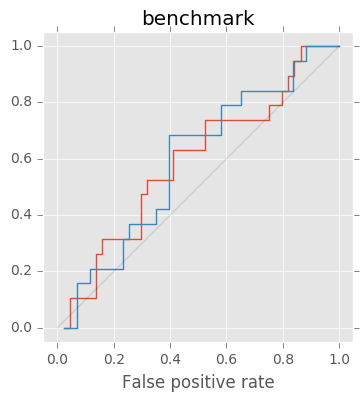

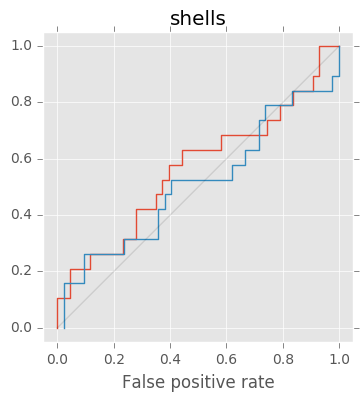

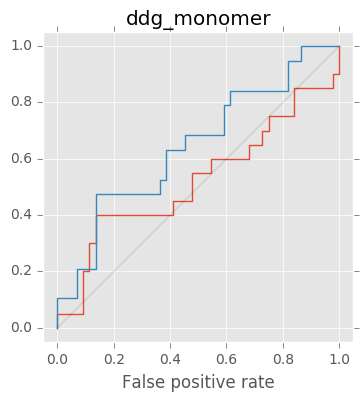

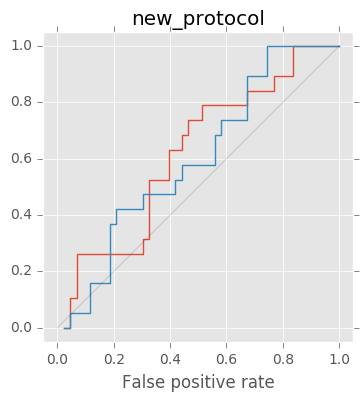

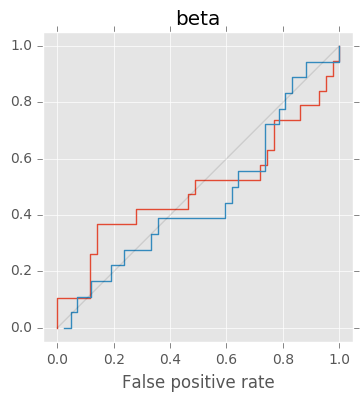

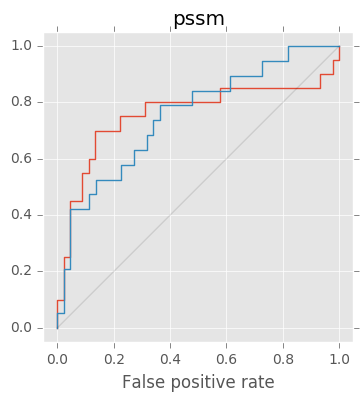

In [67]:
for feature_set_name, target_name, X, y, support in combos:
    if target_name == 'expression': 
        
        plt.figure()
        skf = cross_validation.StratifiedKFold( y, n_folds=2, shuffle=True ) 
        
        for train, test in skf:
            grid = grid_search.GridSearchCV( svm.SVC(probability=True, class_weight='balanced'), param_grid, cv=5 )
            grid.fit( X[ train ], y[ train ] )
            preds = grid.predict( X[ test ] ) 
            probs = grid.predict_proba( X[ test ] )
            fpr, tpr, __ = roc_curve( y[ test ], probs.T[1] )
            plt.plot( tpr, fpr )
        
        plt.plot( [ 0, 1 ], [ 0, 1 ], color='k', alpha=0.1 ) 
        plt.title( feature_set_name )
        plt.xlabel( 'True positive rate' )
        plt.xlabel( 'False positive rate' )
        plt.axis( 'square' ) 
        plt.xlim( -0.05, 1.05 )
        plt.ylim( -0.05, 1.05 )  
        plt.show()